# Best Neighboorhood to find a Ghost

## Types of Deaths
#### Amy Mullen
In order to find the best neighboorhood for ghost hunting, one significant metric is the amount/types of deaths in a given neighborhood. Natural deaths aren't common in spooky stories since there wouldn't be a reason for ghosts to stay and haunt.
So I decided to focus on the more 'unnatural' deaths listed in the data: Homicide, Suicide, and Unintentional injuries.
My goal was to find which neighborhood has the most non-natural deaths as this would increase the likelyhood of finding a ghost lurking there.

In [1]:
import fpsnippets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("mortality_by_tract.csv")

cols = ['Homicide', 'Suicide', 'Unintentional injuries']

df['Ghosts'] = df[cols].sum(axis=1)

filtered_df = df.loc[df['Ghosts'] > 0]


First I added another column to the mortality data which adds up all of the Homicide, Suicide, and Unintentional injuries for each tract.
If the column previously mentioned had no data in it (No Homicide, Suicide, and Unintentional injuries for the tract) then I removed the row so I was left with the tracts that could have ghosts.

In [2]:
def neighbor(row): 
    neigh =  fpsnippets.census_to_neighborhoods(row)
    return neigh

#print (neighbor(42003010300))
my_list=[]

for ind in filtered_df.index:
    x = int(filtered_df['Census_Tract'][ind])
    my_list.append(neighbor(x))

res = list(filter(None, my_list))

def flat(lis):
    flatList = []
    for element in lis:
        if type(element) is list:
            for item in element:
                flatList.append(item)
        else:
            flatList.append(element)
    return flatList

places= flat(res)

d = {x:places.count(x) for x in places}

sortlow = dict(sorted(d.items(), key=lambda x:x[1]))

#print(sortlow)

I then took the filtered data and compared eact tract number to the neighborhoods it applied to using the code given by the UTA. I added the subsequent lists of neighborhoods into one large list and used a dictionary to count the amount of times a neighborhood would show up in the data. I then sorted it by least to most calls.

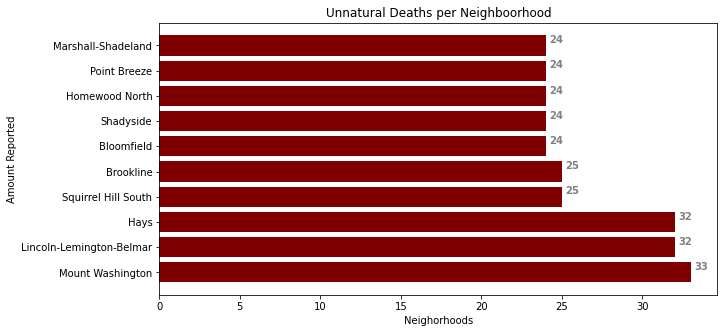

In [3]:
finals = dict(sorted(sortlow.items(), key = lambda x: x[1], reverse = True)[:10])

place = list(finals.keys())
values = list(finals.values())

fig, ax = plt.subplots(figsize =(10, 5))
 
ax.barh(place, values, color ='maroon')

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.xlabel("Neighorhoods")
plt.ylabel("Amount Reported")
plt.title("Unnatural Deaths per Neighboorhood")
plt.show()

From this dictionary I was able to make a graph to visualize the top 10 neighborhoods in terms of unnatural deaths.
* Mount Washington-33
* Lincoln-Lemmington-Belmar and Hays-32
* Squirrel Hill South and Brookline-25
* Bloomfield, Shadyside, Homewood North, Point Breeze, Marshall-Shadyside-24

# Conclusion
I was a bit suprised to see such high unnatrual death counts for places like Shadyside and Squirrel Hill as these are places that are frequently considered 'safe'. This data doesn't nessecarily show that to be false as most of the deaths within this data are from unintentional injuries, but as someone who likes to hang out in Shadyside, I don't hear about deaths there often, if at all.

## Pre 1950s Housing
### Krish Pandya

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,pre1950sTotal,pre1950sCount,Average
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417066e+06,14181.728231,"POLYGON ((-79.90531 40.45549, -79.90488 40.455...",5.665890,9,0.629543
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410838e+07,30326.729782,"POLYGON ((-79.92063 40.44423, -79.92052 40.443...",6.629789,14,0.473556
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426320,"POLYGON ((-79.93546 40.47257, -79.93530 40.472...",4.206054,9,0.467339
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897512e+06,13941.514212,"POLYGON ((-79.96601 40.45520, -79.96595 40.454...",3.535682,6,0.589280
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353056e+06,12021.864889,"POLYGON ((-79.98819 40.41852, -79.98824 40.418...",3.785950,5,0.757190


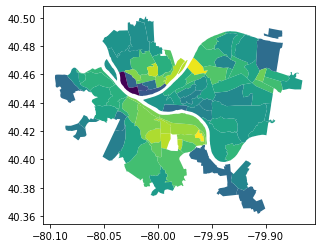

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
data = gpd.read_file('data/Pre1950Housing.shp')
#data.head()
# Load neighborhoods
NEIGHBORHOODS = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
NEIGHBORHOODS['pre1950sTotal'] = 0
NEIGHBORHOODS['pre1950sCount'] = 0

for index, row in data.iterrows():
    for index2, row2 in NEIGHBORHOODS.iterrows():
        if row2["geometry"].intersects(row["geometry"]):
            NEIGHBORHOODS.loc[index2, 'pre1950sTotal'] += row['Pre1950']
            NEIGHBORHOODS.loc[index2, 'pre1950sCount'] += 1
            
NEIGHBORHOODS['Average']=NEIGHBORHOODS['pre1950sTotal'] / NEIGHBORHOODS['pre1950sCount']
NEIGHBORHOODS.plot(column = 'Average')
NEIGHBORHOODS.head()

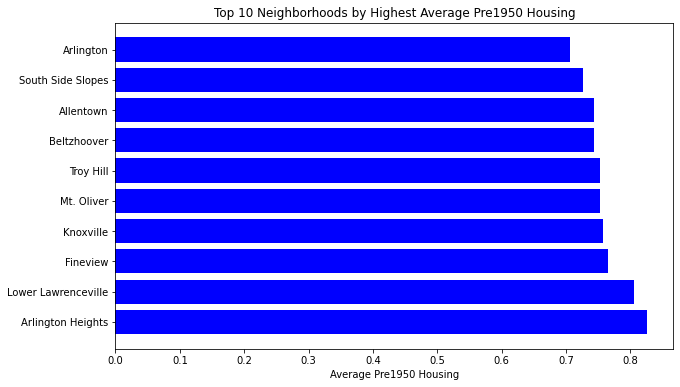

18      Arlington Heights
19    Lower Lawrenceville
89               Fineview
4               Knoxville
67             Mt. Oliver
65              Troy Hill
26            Beltzhoover
30              Allentown
48      South Side Slopes
49              Arlington
Name: hood, dtype: object

In [16]:
NEIGHBORHOODS = NEIGHBORHOODS.sort_values('Average',ascending = False)
top_10_neighborhoods = NEIGHBORHOODS.iloc[0:10,:]
plt.figure(figsize=(10, 6))
plt.barh(top_10_neighborhoods['hood'], top_10_neighborhoods['Average'], color='blue')
plt.xlabel('Average Pre1950 Housing')
plt.title('Top 10 Neighborhoods by Highest Average Pre1950 Housing')
plt.show()
NEIGHBORHOODS['hood'].head(10)

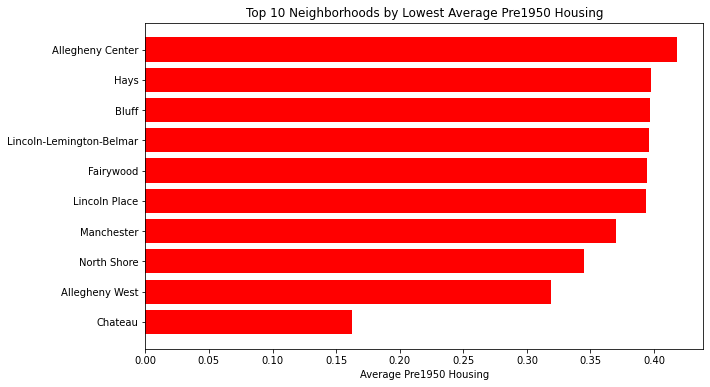

In [17]:
NEIGHBORHOODS = NEIGHBORHOODS.sort_values('Average', ascending=True)
lowest_10_neighborhoods = NEIGHBORHOODS.head(10)

# Plot the lowest 10 neighborhoods on a bar graph
plt.figure(figsize=(10, 6))
plt.barh(lowest_10_neighborhoods['hood'], lowest_10_neighborhoods['Average'], color='red')  # Using a different color for visualization
plt.xlabel('Average Pre1950 Housing')
plt.title('Top 10 Neighborhoods by Lowest Average Pre1950 Housing')
plt.show()

# Conclusion
Looking at the data regarding to older housing we see that Arlington heights has the largest amount of 1950's housing. Arlington Heights was originally composed of 660 housing units built by the Housing Authority of Pittsburgh in 1942. Initially, the residents of these units consisted solely of war workers who had lived too far from their jobs or were living away from their families. On the other end we have chateau which has the least amount of older housing.A period commonly known as the ‘Pittsburgh Renaissance,’ beginning in 1946 and ending in 1973, saw large-scale urban redevelopment throughout the city, most notably downtown, the Hill district and Northside.

## Wooded Areas
### Diego Cuevas
To establish the best neighborhood to ghost hunt, I decided to find the neighborhood with the most wooded areas. Typically, most ghost stories occur in old houses or abandoned places. But there can be the occasional haunted story in a forest.

In [18]:
import fpsnippets
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

NEIGHBORHOODS = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
wooded_areas = geopandas.read_file("https://data.wprdc.org/dataset/8d3104f6-a1dc-46b0-a2bc-9715af02f543/resource/7d60eaf8-c7b8-491d-96cf-671ae3a3b27d/download/alcogisallegheny-county-wooded-area-boundaries.zip")

The first thing I did was read the shapefiles of the neighborhoods and wooded areas of Pittsburgh.

In [19]:
# print(wooded_areas.columns)                         
def wood_to_neighborhoods():
    wood_neighborhoods = {}
    for _idx, wooded in wooded_areas.iterrows():
        wood_point = wooded["geometry"]
        neighborhood_list = []
        for idx, neighborhood in NEIGHBORHOODS.iterrows():
            if neighborhood["geometry"].contains(wood_point):
                neighborhood_list.append(neighborhood["hood"])
        wood_neighborhoods[wooded["WOODLAND_"]] = neighborhood_list
    return wood_neighborhoods

wood = wood_to_neighborhoods()

I then made a function that returns a dictionary of wooded areas and the neighborhood they are in. However, I noticed not all of the wooded areas were within the area of a neighborhood. So I created a filter function to remove any areas that did not have a neighborhood.

In [20]:
def filter_wood_without_neighborhoods(wooded_neighborhoods):
    filtered_wood = {wood: neighborhoods for wood, neighborhoods in wooded_neighborhoods.items() if neighborhoods}
    return filtered_wood
filtered_wood = filter_wood_without_neighborhoods(wood)

def neighborhood_frequency(neighborhoods):
    neighborhood_counts = {}
    for neighborhoods_list in neighborhoods.values():
        for neighborhood in neighborhoods_list:
            if neighborhood in neighborhood_counts:
                neighborhood_counts[neighborhood] += 1
            else:
                neighborhood_counts[neighborhood] = 1
    return neighborhood_counts

wood_neighborhood_freq = neighborhood_frequency(filtered_wood)


But to analyze the data of the neighborhoods with wooded areas, I had to tally up the frequency of wooded areas in each neighborhood. This gave me a dictionary with each neighborhood and the number of forests within them. I then started to use the data to make conclusions.

In [21]:
def neighborhood_with_most_wooded_areas(neighborhood_freq):
    max_neighborhood = max(neighborhood_freq, key=neighborhood_freq.get)
    max_count = neighborhood_freq[max_neighborhood]
    return max_neighborhood, max_count

most_wooded_neighborhood, count = neighborhood_with_most_wooded_areas(wood_neighborhood_freq)
print(f"The neighborhood with the most wooded areas is {most_wooded_neighborhood} with a count of {count}.")

def average_neighborhood_frequency(neighborhood_freq):
    total_wooded_areas = sum(neighborhood_freq.values())
    num_neighborhoods = len(neighborhood_freq)
    average_frequency = total_wooded_areas / num_neighborhoods
    return average_frequency

average_freq = average_neighborhood_frequency(wood_neighborhood_freq)
print(f"The average frequency of wooded areas per neighborhood is {average_freq:.2f}")

The neighborhood with the most wooded areas is Squirrel Hill South with a count of 44.
The average frequency of wooded areas per neighborhood is 9.48


The neighborhood with the most wooded areas is Squirrel Hill South with a count of 44.
The average frequency of wooded areas per neighborhood is 9.48

# Conclusion

I found the neighborhood with the most wooded areas to be Squirrel Hill, and the average of wooded areas in a neighborhood to be 9.48. Squirrel Hill nearly has five times the average. If I were a ghost hunter, I would begin my search for spirits in that Pittsburgh neighborhood

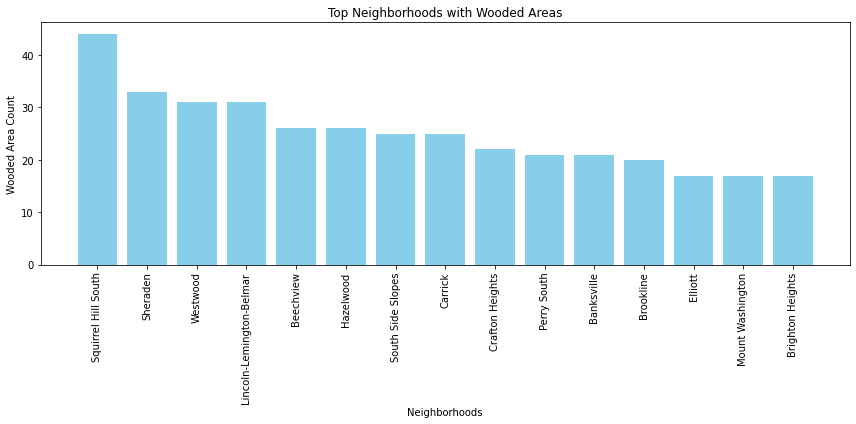

Top 15 Neighborhoods with Wooded Areas:
1. Squirrel Hill South: 44
2. Sheraden: 33
3. Westwood: 31
4. Lincoln-Lemington-Belmar: 31
5. Beechview: 26
6. Hazelwood: 26
7. South Side Slopes: 25
8. Carrick: 25
9. Crafton Heights: 22
10. Perry South: 21
11. Banksville: 21
12. Brookline: 20
13. Elliott: 17
14. Mount Washington: 17
15. Brighton Heights: 17

Bottom 10 Neighborhoods with Wooded Areas:
1. Lower Lawrenceville: 1
2. East Liberty: 1
3. Central Northside: 1
4. Central Lawrenceville: 1
5. East Allegheny: 1
6. Bedford Dwellings: 1
7. Allegheny West: 1
8. Arlington Heights: 1
9. Knoxville: 1
10. South Side Flats: 1


In [22]:
def visualize_neighborhood_frequencies(neighborhood_freq, top_n=15):
    sorted_neighborhoods = sorted(neighborhood_freq, key=neighborhood_freq.get, reverse=True)[:top_n]
    frequencies = [neighborhood_freq[n] for n in sorted_neighborhoods]

    plt.figure(figsize=(12, 6))
    plt.bar(sorted_neighborhoods, frequencies, color='skyblue')
    plt.xlabel('Neighborhoods')
    plt.ylabel('Wooded Area Count')
    plt.title('Top Neighborhoods with Wooded Areas')
    plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels more for better readability
    plt.tight_layout()
    plt.show()
    
    top_neighborhoods = {neighborhood: neighborhood_freq[neighborhood] for neighborhood in sorted_neighborhoods}
    print("Top 15 Neighborhoods with Wooded Areas:")
    for idx, (neighborhood, count) in enumerate(top_neighborhoods.items(), 1):
        print(f"{idx}. {neighborhood}: {count}")
    
    bottom_neighborhoods = sorted(neighborhood_freq, key=neighborhood_freq.get)[:10]
    bottom_freq = {neighborhood: neighborhood_freq[neighborhood] for neighborhood in bottom_neighborhoods}
    print("\nBottom 10 Neighborhoods with Wooded Areas:")
    for idx, (neighborhood, count) in enumerate(bottom_freq.items(), 1):
        print(f"{idx}. {neighborhood}: {count}")
    
visualize_neighborhood_frequencies(wood_neighborhood_freq)

Top 15 Neighborhoods with Wooded Areas:
1. Squirrel Hill South: 44
2. Sheraden: 33
3. Westwood: 31
4. Lincoln-Lemington-Belmar: 31
5. Beechview: 26
6. Hazelwood: 26
7. South Side Slopes: 25
8. Carrick: 25
9. Crafton Heights: 22
10. Perry South: 21
11. Banksville: 21
12. Brookline: 20
13. Elliott: 17
14. Mount Washington: 17
15. Brighton Heights: 17

Bottom 10 Neighborhoods with Wooded Areas:
1. Lower Lawrenceville: 1
2. East Liberty: 1
3. Central Northside: 1
4. Central Lawrenceville: 1
5. East Allegheny: 1
6. Bedford Dwellings: 1
7. Allegheny West: 1
8. Arlington Heights: 1
9. Knoxville: 1
10. South Side Flats: 1

# Final Conclusion
Top 10 best Neighborhoods to find a ghost:
* 1
* 2
* 3
* 4 
* 5 
* 6 
* 7 
* 8 
* 9
* 10